In [2]:
# Copyright (c) 2019 Skymind AI Bhd.
# Copyright (c) 2020 CertifAI Sdn. Bhd.
#
# This program and the accompanying materials are made available under the
# terms of the Apache License, Version 2.0 which is available at
# https://www.apache.org/licenses/LICENSE-2.0.
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations
# under the License.
#
# SPDX-License-Identifier: Apache-2.0

# Feature Scaling

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of **Principle Component Analysis (PCA)** as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. **If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos)**, PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are **not scaled**. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly **incorrect**.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

<br>We will use a small dataset that contains (Physics, Biology and Maths) marks of a classroom of students.

In [4]:
df = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv", index_col=0)

<br>Show the first 5 rows of data.

In [5]:
df.head()

,Physics,Biology,Maths
Name,,,
Arnold,80,78,70
Bob,60,98,45
Cassandra,34,56,65
Donovan,56,65,32
Emily,98,23,55


<br>We can use boxplot to visualize the data

<AxesSubplot:>

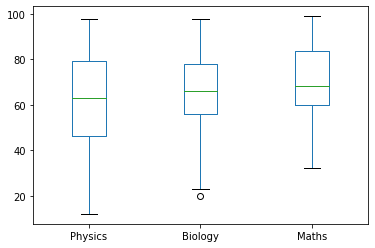

In [6]:
#TODO : Use boxplot to visualize data
df.boxplot(grid=False)

We could notice that the data is spread around the range of 1 to 100

<br>We will use scaling functions from scikit learn to perform some preprocessing techniques to scale our data.
<br>**Min-Max normalization** involves scaling features to lie between a given minimum and maximum value, often between zero and one.

In [8]:
#TODO : Use Min-Max normalization for scaling
scaler = preprocessing.MinMaxScaler()

<br>We will use Min-Max Scaling to scale all the columns of data.

In [11]:
#TODO : Fit the data to perform scaling
data_scaled = scaler.fit_transform(df)

<br>Transform the numpy array containing our scaled data into a pandas data frame.

In [12]:
df_new = pd.DataFrame(data_scaled, index=df.index)

<br>Shows the first 5 rows of the scaled data

In [13]:
df_new.head()

,0,1,2
Name,,,
Arnold,0.790698,0.743590,0.567164
Bob,0.558140,1.000000,0.194030
Cassandra,0.255814,0.461538,0.492537
Donovan,0.511628,0.576923,0.000000
Emily,1.000000,0.038462,0.343284


As you can see, our values are scaled into a *range from 0 to 1*.

<AxesSubplot:>

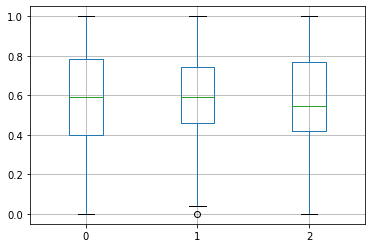

In [14]:
df_new.boxplot()

Another common scaling technique is the **Standard Scaler**.
<br>Standard Scaler Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

$$z = \frac{x - u}{s}$$

where $u$ is the mean of the training samples or zero if `with_mean = False`, and $s$ is the standard deviation of the training samples or one if `with_std = False`.

**Standardization** of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

<br>Now use the standard scaler to scale the data

In [16]:
#TODO : Use standardization for scaling
scaler = preprocessing.StandardScaler()

<br>Apply the scaler on the dataset and use df.head to visual the data

In [17]:
data_scaled = scaler.fit_transform(df)
df_new = pd.DataFrame(data_scaled, index=df.index)
df_new.head()

,0,1,2
Name,,,
Arnold,0.727807,0.523052,0.013572
Bob,-0.169017,1.477393,-1.456760
Cassandra,-1.334888,-0.526723,-0.280494
Donovan,-0.348382,-0.097269,-2.221333
Emily,1.534948,-2.101384,-0.868627


<br>
By plotting boxplot we can see that the range of the data changed where their average mean will be 0

<AxesSubplot:>

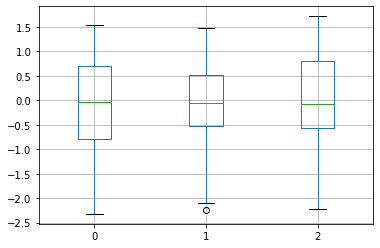

In [18]:
df_new.boxplot()

# Example of improved performance using Standard Scaling 

In this example, we will use a social network advertisment dataset which the result will be whether the targeted person purchased the items in the advertisement

In [23]:
df = pd.read_csv("data/socialnetads.csv")

Visualizing the first 5 example of the dataset

In [24]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Dropping column User ID which are not needed in the training

In [ ]:
df.drop(columns=['User ID'], axis=1, inplace=True)
df.head()

Use One Hot Encoding to split the Gender attribute into binary values

In [ ]:
df = pd.get_dummies(df, columns=['Gender'])
df.head()

Assigning the attributes that are needed for training

In [ ]:
df.columns
y = df['Purchased']
df.drop(columns=['Purchased'], axis=1, inplace=True)
X = df

Splitting the data into training set and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

Training the model with Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

Get the prediction using the test set

In [ ]:
predict = model.predict(X_test)

Calculating the accuracy score for the trained model

In [ ]:
accuracy = metrics.accuracy_score(predict, y_test)
print(accuracy)

As from here we can see the the performance of the model is not that good, if we use feature scaling, the performance will be better.

Scale the training set data with Standard Scaler
<br> We will only fit the training set only as we learn the means and standard deviation of the training set, and then:

- Standardize the training set using the training set means and standard deviations.
- Standardize the test set using the training set means and standard deviations.

Anything that we want to learn, must be learned from the model's training data, this is because we want to keep the test set data to be "unknown" by the model. If we scale the training set and test set together, we are actually using the knowledge of the whole data which result in "leaking information"

Besides that,  the test set data should be using the scaler from  the training set data . If we scale the training set data and test set data separately, the value of 1.0 in training set data and 1.0 in test set data would actually be different as they learned from each respective mean and standard deviation. In the end it would greatly impact the model performance.

In [ ]:
# TODO : Use Standard Scaler to scale your data
# TODO: Remember to use scaler on training set data only and use the scaler to scale both training set data and test set data

scaler = preprocessing.()
X_train = scaler.()
X_test = scaler.()

Now let us train the model again with the scaled data and look at the output of the accuracy

In [ ]:
model.fit(X_train, y_train)
predict = model.predict(X_test)
accuracy = metrics.accuracy_score(predict, y_test)
print(accuracy)

We can see that there is a great improvement in the accuracy after we scaled the data